## Imports and Setup

In [133]:
from helper_functions_wine import pd, os, shutil
from helper_functions_wine import convert_samples_to_binary, get_column_data_types, print_library_versions, add_id_column, order_columns_by_correlation, organize_photos_in_folders

### Try to get library versions matching the following:

In [134]:
print_library_versions()

pandas version:           1.4.1
matplotlib version:       3.5.1
numpy version:            1.23.5
bitstring version:        3.1.9
joblib version:           1.1.0
PIL version:              9.3.0


## Data Loading and Cleaning

In [135]:
# FIXME - update the filename to point to your dataset
filename = "C:/Users/darri/CMU/cyber-research/BinaryImageTransformation/data/csv/wine-cultivars.csv"
df = pd.read_csv(filename)

### Spend some time familiarizing yourself with your dataset. Here are some basic commands

In [136]:
df.head()

,cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cultivar                      178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoids                 178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

# NOTE:
The following code segments are specific to my dataset. This is where you will need to perform your own data cleaning!!!
<br />
<br />
This will be the most difficult/time intensive aspect! Everything else will be plug and play!

In [138]:
# FIXME - change the value 'species' to match the 'y' value of your dataset
# This function will give your dataframe an 'id' column which will be used to identify the samples in the dataset
# The 'id' column will be used to name the photos of the samples
classification_id = 'cultivar'
df = add_id_column(df, classification_id) #changed function to deal with int values
df

,cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Id
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1-1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1-2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1-3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1-4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3-44
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3-45
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3-46
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3-47


In [139]:
# FIXME - get the correct values in the x and Y variables for your dataset
# As long as you have the correct value in `classification_id` from earlier, you shouldn't need any changes here unless there is another column you want to drop
# For instance, if you have an overfit feature such as a timestamp, you can drop it here
x = df.drop([classification_id, 'Id'], axis=1)
Y = df[classification_id]
print(f"x {x.shape}")
print(f"Y {Y.shape}")
print(f"This value should be True: {x.shape[0] == Y.shape[0]}")

x (178, 13)
Y (178,)
This value should be True: True


## Image Generation

In [25]:
# FIXME - update `image_directory`` to point to a directory where you want the images to be saved. 
# Change any other constants you want to change
image_directory = "C:/Users/darri/CMU/cyber-research/BinaryImageTransformation/data/images/image-results-wine2"
feature_types = get_column_data_types(x)
# Precision: the number of binary digits to use for each feature (use a power of 2)
precision = 64
# one: the value to use for a 1 in the binary representation (128 is a dark pixel)
one = 128
zero = 0
# num_jobs: the number of jobs to run in parallel (-1 means use all available cores)
n_jobs = -1
# For feature_types, 0 = float, 1 = int, 2 = bool
# Notice mine are all 0's because I only have float values in my dataset, you may have different values
print(feature_types)

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]


In [26]:
convert_samples_to_binary(x, df["Id"], image_directory, precision, one, zero, n_jobs, feature_types)

Time to convert 178 samples to binary: 5.066683769226074 seconds. Seconds per sample = 0.028464515557449856


## Place Folders into the Correct Categories

In [27]:
organize_photos_in_folders(image_directory, Y)

178
{'1': 59, '2': 71, '3': 48}


In [28]:
#FIXME Upload your photos to the Google Drive Data Folder!

## Train ResNet50
If you used my yaml files where there are two conda environments, this is the stage where you will change to the `keras_gpu` environment. If you used the alternative method, you should be in the correct environment already.

### Once experiments are running, view the live updates on TensorBoard
Run the command `tensorboard --logdir=[your log directory]` in the terminal. 
<br />
<br />
Then, open a browser and navigate to `localhost:6006`.
<br />
<br />
![TensorBoard](./imgs/tensorboard.png)

In [154]:
from resnet import print_dl_versions, train_resnet_model_k_fold, evaluate_on_test_data, plot_metrics

In [155]:
# FIXME - update the values below to match your dataset
# Multiple of 2 such that it is greater than or equal to the number of features you have
img_size = 64
target_size = (img_size,img_size)
# Number of classification types (classes) in your dataset
num_classes = 3
# Number of samples to run through the model before updating the weights
# Higher batch size means more memory is required and training will be faster. Maybe use 64 for larger datasets
batch_size = 64
# Number of times to run through training a model
# Depending on the size of your dataset, you may want to increase/decrease this number
num_folds = 5
# Number of times to run through the entire dataset
number_of_epochs = 100

In [14]:
#Changed values to tune for results
#In resnet.py -> get_callbacks() -> patiences to stop=35 & patience to reduce lr=25
new_dir = image_directory + '/data'
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{image_directory}/results/", num_folds, batch_size)

Fold:  0
Found 144 images belonging to 3 classes.
Found 34 images belonging to 3 classes.


c:\Users\darri\anaconda3\envs\cyber-research\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
c:\Users\darri\anaconda3\envs\cyber-research\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 1/150
3/3 [==============================] - 23s 3s/step - loss: 1.6606 - acc: 0.3611 - f1_m: 0.3735 - precision_m: 0.4253 - recall_m: 0.3333 - auc: 0.5220 - false_negatives: 101.0000 - false_positives: 68.0000 - true_negatives: 220.0000 - true_positives: 43.0000 - mean_absolute_error: 0.4380 - mean_squared_error: 0.2915 - val_loss: 26.7961 - val_acc: 0.4118 - val_f1_m: 0.4118 - val_precision_m: 0.4118 - val_recall_m: 0.4118 - val_auc: 0.5588 - val_false_negatives: 20.0000 - val_false_positives: 20.0000 - val_true_negatives: 48.0000 - val_true_positives: 14.0000 - val_mean_absolute_error: 0.3922 - val_mean_squared_error: 0.3922

Epoch 00001: val_acc improved from -inf to 0.41176, saving model to C:/Users/darri/CMU/cyber-research/BinaryImageTransformation/data/images/image-results-wine2/results\fold0-resnet50v2-saved-model-01-val_acc-0.41.hdf5
Epoch 2/150
3/3 [==============================] - 0s 95ms/step - loss: 1.3687 - acc: 0.4653 - f1_m: 0.4078 - precision_m: 0.4781 - recall_

In [15]:
print("Average metrics over k folds")
print(average_history)

Average metrics over k folds
{'loss': 0.017805997747927904, 'acc': 0.9958333373069763, 'f1_m': 0.990625, 'precision_m': 0.990625, 'recall_m': 0.990625, 'auc': 0.9999999403953552, 'false_negatives': 0.0, 'false_positives': 0.0, 'true_negatives': 288.0, 'true_positives': 144.0, 'mean_absolute_error': 0.005776573764160275, 'mean_squared_error': 0.0027735831099562347, 'val_loss': 3.557817983627319, 'val_acc': 0.5764705955982208, 'val_f1_m': 0.576470535993576, 'val_precision_m': 0.5764705955982208, 'val_recall_m': 0.5764705955982208, 'val_auc': 0.7262109518051147, 'val_false_negatives': 14.0, 'val_false_positives': 14.0, 'val_true_negatives': 54.0, 'val_true_positives': 20.0, 'val_mean_absolute_error': 0.28352228701114657, 'val_mean_squared_error': 0.27142558097839353, 'lr': 0.004999999864958226}


In [16]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

Best model metrics
{'loss': 0.006047133821994066, 'acc': 1.0, 'f1_m': 1.0, 'precision_m': 1.0, 'recall_m': 1.0, 'auc_2': 0.9999999403953552, 'false_negatives_2': 0.0, 'false_positives_2': 0.0, 'true_negatives_2': 288.0, 'true_positives_2': 144.0, 'mean_absolute_error': 0.0031827185302972794, 'mean_squared_error': 0.0010258666006848216, 'val_loss': 3.417086362838745, 'val_acc': 0.6470588445663452, 'val_f1_m': 0.6470587849617004, 'val_precision_m': 0.6470588445663452, 'val_recall_m': 0.6470588445663452, 'val_auc_2': 0.791738748550415, 'val_false_negatives_2': 12.0, 'val_false_positives_2': 12.0, 'val_true_negatives_2': 56.0, 'val_true_positives_2': 22.0, 'val_mean_absolute_error': 0.2349618822336197, 'val_mean_squared_error': 0.22695386409759521, 'lr': 0.01}


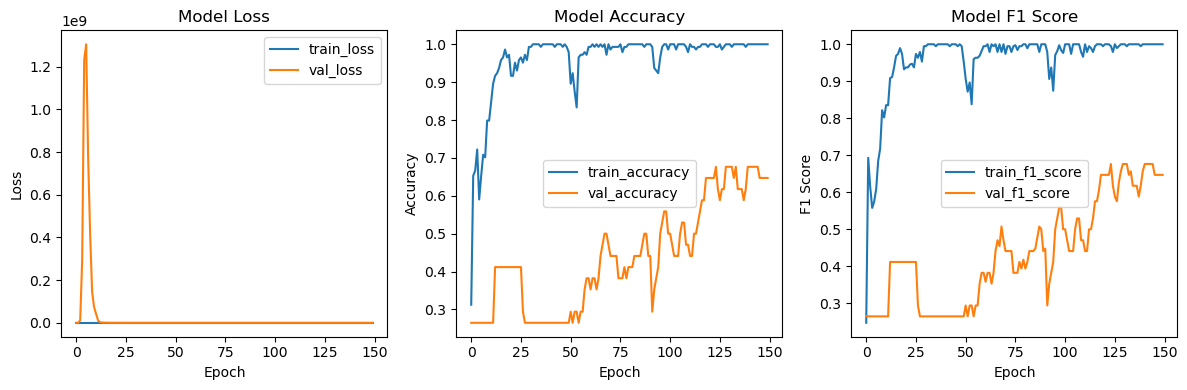

In [17]:
plot_metrics(best_model.history)

# Correlated Binary Encoding

In [18]:
#FIXME - update the directories to point where you would like
image_directory = "C:/Users/darri/CMU/cyber-research/BinaryImageTransformation/data/images/image-results-wine2-correlated"
new_dir = image_directory + '/data/'

In [19]:
correlated_order = order_columns_by_correlation(df, classification_id, True)

ordering columns by correlation: cultivar, 15, [1 2 3]


In [20]:
correlated_df = df.reindex(columns=correlated_order)

In [21]:
x = correlated_df.drop([classification_id, 'Id'], axis=1)
Y = correlated_df[classification_id]
print(f"x {x.shape}")
print(f"Y {Y.shape}")
print(f"This value should be True: {x.shape[0] == Y.shape[0]}")

x (178, 13)
Y (178,)
This value should be True: True


In [22]:
# FIXME - update the image directory to point to a directory where you want the images to be saved. Create a folder there.
# Change any other constants you want to change
#image_directory = "/mnt/sda1/image-results-iris-correlated"
feature_types = get_column_data_types(x)
# For feature_types, 0 = float, 1 = int, 2 = bool
print(feature_types)

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]


In [23]:
convert_samples_to_binary(x, correlated_df["Id"], image_directory, precision, one, zero, n_jobs, feature_types)

Time to convert 178 samples to binary: 0.3818953037261963 seconds. Seconds per sample = 0.002145479234416833


In [24]:
organize_photos_in_folders(image_directory, Y)

178
{'1': 59, '2': 71, '3': 48}


In [25]:
new_dir = image_directory + '/data'
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{image_directory}/results/", num_folds, batch_size)

Fold:  0
Found 144 images belonging to 3 classes.
Found 34 images belonging to 3 classes.


c:\Users\darri\anaconda3\envs\cyber-research\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
c:\Users\darri\anaconda3\envs\cyber-research\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 1/150
3/3 [==============================] - 16s 5s/step - loss: 1.5075 - acc: 0.4097 - f1_m: 0.3196 - precision_m: 0.3818 - recall_m: 0.2760 - auc_5: 0.5649 - false_negatives_5: 100.0000 - false_positives_5: 63.0000 - true_negatives_5: 225.0000 - true_positives_5: 44.0000 - mean_absolute_error: 0.4180 - mean_squared_error: 0.2617 - val_loss: 890.3699 - val_acc: 0.4118 - val_f1_m: 0.4118 - val_precision_m: 0.4118 - val_recall_m: 0.4118 - val_auc_5: 0.5588 - val_false_negatives_5: 20.0000 - val_false_positives_5: 20.0000 - val_true_negatives_5: 48.0000 - val_true_positives_5: 14.0000 - val_mean_absolute_error: 0.3922 - val_mean_squared_error: 0.3922

Epoch 00001: val_acc improved from -inf to 0.41176, saving model to C:/Users/darri/CMU/cyber-research/BinaryImageTransformation/data/images/image-results-wine2-correlated/results\fold0-resnet50v2-saved-model-01-val_acc-0.41.hdf5
Epoch 2/150
3/3 [==============================] - 0s 133ms/step - loss: 1.2572 - acc: 0.6111 - f1_m: 0.609

In [26]:
print("Average metrics over k folds")
print(average_history)

Average metrics over k folds
{'loss': 0.015049551613628864, 'acc': 0.9972222208976745, 'f1_m': 0.9947916626930237, 'precision_m': 0.9947916626930237, 'recall_m': 0.9947916626930237, 'auc_5': 1.0, 'false_negatives_5': 0.0, 'false_positives_5': 0.0, 'true_negatives_5': 288.0, 'true_positives_5': 144.0, 'mean_absolute_error': 0.003017155680572614, 'mean_squared_error': 0.001865376057321555, 'val_loss': 3.4568933725357054, 'val_acc': 0.6411764740943908, 'val_f1_m': 0.639215636253357, 'val_precision_m': 0.6433823585510254, 'val_recall_m': 0.6352941274642945, 'val_auc_5': 0.8150952458381653, 'val_false_negatives_5': 12.0, 'val_false_positives_5': 12.0, 'val_true_negatives_5': 56.0, 'val_true_positives_5': 22.0, 'val_mean_absolute_error': 0.2306264191865921, 'val_mean_squared_error': 0.2101287990808487, 'lr': 0.008399999793618917}


In [27]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

Best model metrics
{'loss': 0.0015903423773124814, 'acc': 1.0, 'f1_m': 1.0, 'precision_m': 1.0, 'recall_m': 1.0, 'auc_6': 1.0, 'false_negatives_6': 0.0, 'false_positives_6': 0.0, 'true_negatives_6': 288.0, 'true_positives_6': 144.0, 'mean_absolute_error': 0.001019966322928667, 'mean_squared_error': 6.97165887686424e-05, 'val_loss': 2.508110523223877, 'val_acc': 0.6764705777168274, 'val_f1_m': 0.6764705181121826, 'val_precision_m': 0.6764705777168274, 'val_recall_m': 0.6764705777168274, 'val_auc_6': 0.779411792755127, 'val_false_negatives_6': 11.0, 'val_false_positives_6': 11.0, 'val_true_negatives_6': 57.0, 'val_true_positives_6': 23.0, 'val_mean_absolute_error': 0.2209213227033615, 'val_mean_squared_error': 0.2092779278755188, 'lr': 0.0019999999}


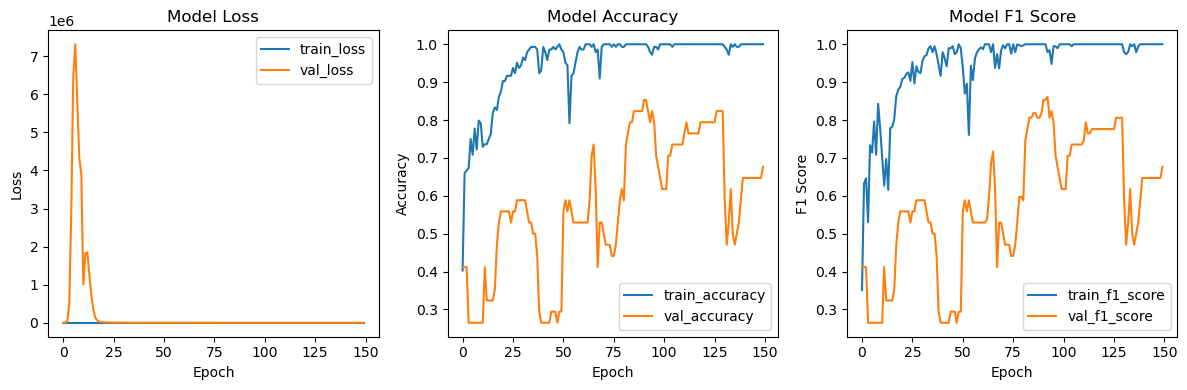

In [28]:
plot_metrics(best_model.history)

# IGTD

In [141]:
from IGTD_Functions import min_max_transform, table_to_image, generate_feature_distance_ranking,generate_matrix_distance_ranking,IGTD,run

In [142]:
save_image_size = 3 # Size of ranking pictures
max_step = 100000    # The maximum number of iterations to run the IGTD algorithm, if it does not converge.
val_step = 300  # The number of iterations for determining algorithm convergence. If the error reduction rate
                # is smaller than a pre-set threshold for val_step itertions, the algorithm converges.
fea_dist_method = 'Euclidean'
image_dist_method = 'Euclidean'
error = 'squared'
result_dir = "C:/Users/darri/CMU/cyber-research/BinaryImageTransformation/data/images/image-results-wine-IGTD"

In [143]:
def normalize_data(data):
    norm_data = min_max_transform(data.values)
    norm_data = pd.DataFrame(norm_data, columns=data.columns, index=data.index)
    return norm_data

In [144]:
df = df.set_index('Id')

In [145]:
normalized_data = normalize_data(df.drop([classification_id],  axis=1))


In [146]:
import numpy as np
zero_cols = pd.DataFrame(0, index=normalized_data.index, columns=['zero0', 'zero1', 'zero2', 'zero3', 'zero4'])
normalized_data = pd.concat([normalized_data, zero_cols], axis=1)
normalized_data

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,zero0,zero1,zero2,zero3,zero4
Id,,,,,,,,,,,,,,,,,,
1-1,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0,0,0,0,0
1-2,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0,0,0,0,0
1-3,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0,0,0,0,0
1-4,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0,0,0,0,0
1-5,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3-44,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529,0,0,0,0,0
3-45,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,0,0,0,0,0
3-46,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,0,0,0,0,0


In [148]:
#image scale had to match size it wanted, 18 for the 18 columns
image_scale = [3,6]
scale,coordinate,normDir,min_id,index = table_to_image(normalized_data, image_scale, fea_dist_method, image_dist_method, save_image_size,
            max_step, val_step, result_dir, error)

Step 0 err: 460444.0
Step 1 err: 446565.0
Step 2 err: 433642.0
Step 3 err: 428807.0
Step 4 err: 408323.0
Step 5 err: 402524.0
Step 6 err: 311777.5
Step 7 err: 298634.5
Step 8 err: 213138.5
Step 9 err: 210405.5
Step 10 err: 208927.5
Step 11 err: 205436.5
Step 12 err: 166552.5
Step 13 err: 166552.5
Step 14 err: 158888.5
Step 15 err: 158888.5
Step 16 err: 158888.5
Step 17 err: 158888.5
Step 18 err: 158770.5
Step 19 err: 158770.5
Step 20 err: 158770.5
Step 21 err: 158770.5
Step 22 err: 158770.5
Step 23 err: 158770.5
Step 24 err: 158770.5
Step 25 err: 158770.5
Step 26 err: 158770.5
Step 27 err: 158770.5
Step 28 err: 158770.5
Step 29 err: 158770.5
Step 30 err: 158770.5
Step 31 err: 158770.5
Step 32 err: 158770.5
Step 33 err: 158770.5
Step 34 err: 158770.5
Step 35 err: 158770.5
Step 36 err: 158770.5
Step 37 err: 158770.5
Step 38 err: 158770.5
Step 39 err: 158770.5
Step 40 err: 158770.5
Step 41 err: 158770.5
Step 42 err: 158770.5
Step 43 err: 158770.5
Step 44 err: 158770.5
Step 45 err: 158770.

In [149]:
normalized_data

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,zero0,zero1,zero2,zero3,zero4
Id,,,,,,,,,,,,,,,,,,
1-1,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0,0,0,0,0
1-2,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0,0,0,0,0
1-3,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0,0,0,0,0
1-4,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0,0,0,0,0
1-5,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3-44,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529,0,0,0,0,0
3-45,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,0,0,0,0,0
3-46,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,0,0,0,0,0


In [151]:
run(normalized_data, index, min_id, scale, coordinate, normDir)

In [152]:
organize_photos_in_folders(result_dir+'/data', Y)

178
{'1': 59, '2': 71, '3': 48}


In [161]:
new_dir = result_dir + '/data'
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{result_dir}/results/", num_folds, batch_size, small_dataset=False)

Fold:  0
Found 144 images belonging to 3 classes.
Found 34 images belonging to 3 classes.


c:\Users\darri\anaconda3\envs\cyber-research\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
c:\Users\darri\anaconda3\envs\cyber-research\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 1/100
3/3 [==============================] - 20s 6s/step - loss: 1.2692 - acc: 0.4375 - f1_m: 0.4126 - precision_m: 0.4670 - recall_m: 0.3698 - auc_5: 0.6097 - false_negatives_5: 97.0000 - false_positives_5: 65.0000 - true_negatives_5: 223.0000 - true_positives_5: 47.0000 - mean_absolute_error: 0.4022 - mean_squared_error: 0.2463 - val_loss: 2.7493 - val_acc: 0.5294 - val_f1_m: 0.5294 - val_precision_m: 0.5294 - val_recall_m: 0.5294 - val_auc_5: 0.6594 - val_false_negatives_5: 16.0000 - val_false_positives_5: 16.0000 - val_true_negatives_5: 52.0000 - val_true_positives_5: 18.0000 - val_mean_absolute_error: 0.3224 - val_mean_squared_error: 0.2502

Epoch 00001: val_acc improved from -inf to 0.52941, saving model to C:/Users/darri/CMU/cyber-research/BinaryImageTransformation/data/images/image-results-wine-IGTD/results\fold0-resnet50v2-saved-model-01-val_acc-0.53.hdf5
Epoch 2/100
3/3 [==============================] - 1s 113ms/step - loss: 0.8707 - acc: 0.6597 - f1_m: 0.6865 - precis

In [162]:
print("Average metrics over k folds")
print(average_history)

Average metrics over k folds
{'loss': 0.007537451240932569, 'acc': 0.9986111164093018, 'f1_m': 0.9989583373069764, 'precision_m': 0.9989583373069764, 'recall_m': 0.9989583373069764, 'auc_5': 1.0, 'false_negatives_5': 0.0, 'false_positives_5': 0.0, 'true_negatives_5': 288.0, 'true_positives_5': 144.0, 'mean_absolute_error': 0.0038578359177336096, 'mean_squared_error': 0.0013023475696897434, 'val_loss': 126.50353422164918, 'val_acc': 0.44117647409439087, 'val_f1_m': 0.4411764144897461, 'val_precision_m': 0.44117647409439087, 'val_recall_m': 0.44117647409439087, 'val_auc_5': 0.5540657043457031, 'val_false_negatives_5': 22.0, 'val_false_positives_5': 22.0, 'val_true_negatives_5': 46.0, 'val_true_positives_5': 12.0, 'val_mean_absolute_error': 0.3729025274515152, 'val_mean_squared_error': 0.36785494685173037, 'lr': 0.001999999862164259}


In [163]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

Best model metrics
{'loss': 0.0231834314763546, 'acc': 0.9930555820465088, 'f1_m': 0.9947916865348816, 'precision_m': 0.9947916865348816, 'recall_m': 0.9947916865348816, 'auc_6': 0.9998795390129089, 'false_negatives_6': 1.0, 'false_positives_6': 1.0, 'true_negatives_6': 287.0, 'true_positives_6': 143.0, 'mean_absolute_error': 0.01134508103132248, 'mean_squared_error': 0.004301008302718401, 'val_loss': 6.193986892700195, 'val_acc': 0.7941176295280457, 'val_f1_m': 0.7941175699234009, 'val_precision_m': 0.7941176295280457, 'val_recall_m': 0.7941176295280457, 'val_auc_6': 0.8492648601531982, 'val_false_negatives_6': 7.0, 'val_false_positives_6': 7.0, 'val_true_negatives_6': 61.0, 'val_true_positives_6': 27.0, 'val_mean_absolute_error': 0.15252237021923065, 'val_mean_squared_error': 0.14186441898345947, 'lr': 0.0019999999}


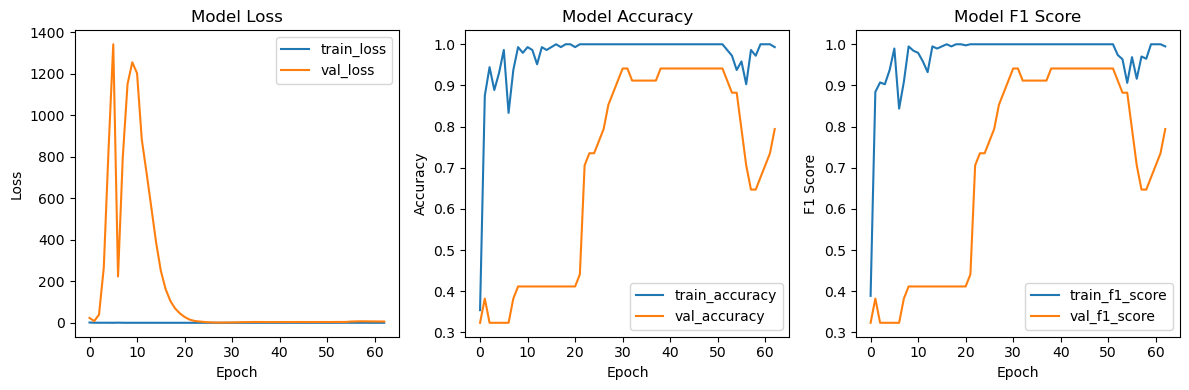

In [164]:
plot_metrics(best_model.history)